<a href="https://colab.research.google.com/github/Khush7860/DL/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression with keras

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Read the dataset


In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

41

In [7]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [8]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## Seprate X and Y (PE)

In [9]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [10]:
X.head

<bound method NDFrame.head of          AT      V       AP     RH
0      8.34  40.77  1010.84  90.01
1     23.64  58.49  1011.40  74.20
2     29.74  56.90  1007.15  41.91
3     19.07  49.69  1007.22  76.79
4     11.80  40.66  1017.13  97.20
...     ...    ...      ...    ...
9563  15.12  48.92  1011.80  72.93
9564  33.41  77.95  1010.30  59.72
9565  15.99  43.34  1014.20  78.66
9566  17.65  59.87  1018.58  94.65
9567  23.68  51.30  1011.86  71.24

[9527 rows x 4 columns]>

In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4: Preprocess x using pipelines

In [12]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')



In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Apply Train Test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [17]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [18]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [19]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [20]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [21]:
xtrain.shape

(7621, 4)

In [22]:
xtest.shape

(1906, 4)

In [23]:
xtrain.shape[1]

4

## Step 5: Build the neural network

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [25]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [26]:
#Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [27]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 5ms/step - loss: 203434.1562 - mae: 450.7035 - val_loss: 197360.2344 - val_mae: 443.8930
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 179268.0625 - mae: 422.5010 - val_loss: 151755.5781 - val_mae: 388.2818
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 113335.5859 - mae: 330.2668 - val_loss: 72813.5625 - val_mae: 259.2134
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 47504.8828 - mae: 196.6441 - val_loss: 28435.0879 - val_mae: 144.9917
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 23122.3711 - mae: 130.3220 - val_loss: 18427.1797 - val_mae: 115.7364
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 16635.4414 - mae: 109.9663 - val_loss: 14041.0957 - val_mae: 101.3629
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 12414.1523 - mae: 95.1318 - val_loss: 10213.8916 - val_ma

In [28]:
hist.history["loss"]

[203434.15625,
 179268.0625,
 113335.5859375,
 47504.8828125,
 23122.37109375,
 16635.44140625,
 12414.15234375,
 8736.69921875,
 5722.9287109375,
 3522.493896484375,
 2102.62060546875,
 1259.58447265625,
 798.0679321289062,
 539.8103637695312,
 380.9235534667969,
 276.5926513671875,
 204.619384765625,
 154.07672119140625,
 118.12307739257812,
 92.98388671875,
 74.89380645751953,
 61.83784484863281,
 52.15281295776367,
 44.915828704833984,
 39.447933197021484,
 35.34107208251953,
 31.95870590209961,
 29.588850021362305,
 27.594707489013672,
 26.045894622802734,
 24.90334701538086,
 23.930496215820312,
 23.177457809448242,
 22.511449813842773,
 22.042699813842773,
 21.597061157226562,
 21.250444412231445,
 21.215045928955078,
 20.94290542602539,
 20.83266830444336,
 21.13783073425293,
 20.644073486328125,
 20.6427059173584,
 20.5987491607666,
 20.470714569091797,
 20.49408721923828,
 20.278615951538086,
 20.32779884338379,
 20.273561477661133,
 20.270742416381836,
 20.210935592651367,
 

In [29]:
hist.history['val_loss']

[197360.234375,
 151755.578125,
 72813.5625,
 28435.087890625,
 18427.1796875,
 14041.095703125,
 10213.8916015625,
 6914.67333984375,
 4345.83544921875,
 2604.90380859375,
 1532.1424560546875,
 939.4098510742188,
 621.3681640625,
 433.7793273925781,
 310.85821533203125,
 231.8986053466797,
 169.9266357421875,
 129.8452911376953,
 99.96786499023438,
 79.68362426757812,
 64.78429412841797,
 54.15434265136719,
 46.449188232421875,
 40.51173782348633,
 36.15316390991211,
 32.79436492919922,
 30.851179122924805,
 28.17111587524414,
 26.753124237060547,
 25.89342498779297,
 24.52946662902832,
 23.54587745666504,
 22.769983291625977,
 23.15343475341797,
 22.02349090576172,
 21.453296661376953,
 21.458044052124023,
 20.855998992919922,
 21.03778648376465,
 20.684179306030273,
 21.296480178833008,
 21.13849449157715,
 20.873605728149414,
 20.349987030029297,
 20.217641830444336,
 20.135061264038086,
 20.27281379699707,
 19.976987838745117,
 20.14176368713379,
 19.987117767333984,
 19.998321533

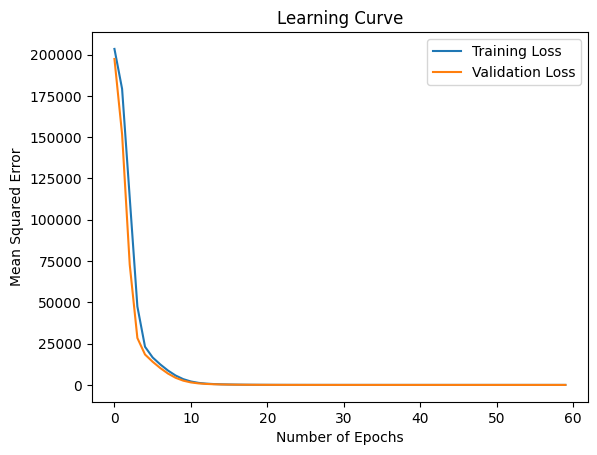

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [31]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 19.5298 - mae: 3.4549


[19.529781341552734, 3.4549264907836914]

In [32]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.4805 - mae: 3.4897


[19.480514526367188, 3.48974871635437]

## Predict the results for train and test

In [33]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [34]:
ypred_train[0:5]

array([[451.6029 ],
       [478.77005],
       [468.84198],
       [431.6954 ],
       [467.08832]], dtype=float32)

In [35]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [36]:
ypred_test[0:5]

array([[428.38992],
       [481.73685],
       [483.17697],
       [449.70135],
       [447.16415]], dtype=float32)

In [37]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [38]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.932052590350014

In [39]:
# R2 score in test
r2_score(ytest, ypred_test)

0.9354500300987432

## Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [40]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()


,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [41]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [42]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [43]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[445.32523],
       [438.80408],
       [432.35318],
       [439.56534],
       [473.96567]], dtype=float32)

In [44]:
xnew["PowerOutput_pred"] = preds

In [45]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.325226
1,28.88,54.89,1007.16,46.60,438.804077
2,27.89,73.21,1001.32,85.88,432.353180
3,25.69,62.26,1011.38,74.08,439.565338
4,12.16,40.81,1025.79,70.97,473.965668
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.432190
96,11.78,39.96,1011.37,82.95,472.457764
97,5.62,41.38,1020.91,86.21,484.401398
98,24.96,74.99,1008.25,80.52,436.214874


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

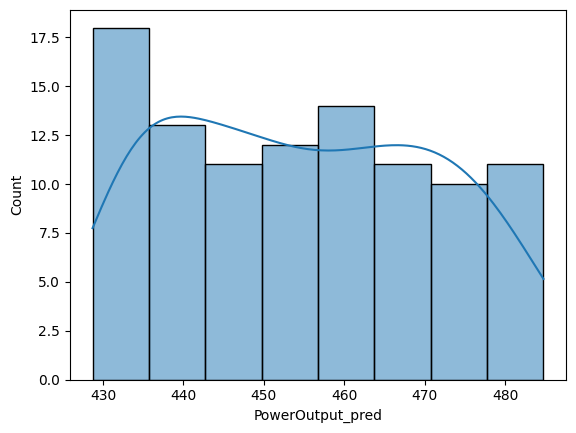

In [46]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [49]:
xnew.to_csv("Results.csv", index=False)